In [1]:
from examples.hot_cold import init_bprogram, params
from dfs.dfs_bprogram import DFSBProgram
import spot
from buddy import bddtrue, bdd_ithvar
spot.setup()
params["n"] = 3

In [ ]:
dfs = DFSBProgram(init_bprogram)
(init, states, events), time = dfs.run()
graph = DFSBProgram.save_graph(init, states, "graph.dot")
graph

In [ ]:
bdict = spot.make_bdd_dict()
game = spot.make_twa_graph(bdict)
game.new_states(len(states))

dict_bdd = {}
for e in events:
    dict_bdd[e.name] = bdd_ithvar(game.register_ap(e.name))


for s1 in states:
    for e, s2 in s1.transitions.items():
        if any(s1.must_finish):
            game.new_edge(states[s1], states[s2], dict_bdd[e.name])
        else:
            game.new_edge(states[s1], states[s2], dict_bdd[e.name], [0])

game.set_init_state(0)
game.set_buchi()
game.prop_state_acc(True)
spot.set_state_players(game, [True]*len(states))
game.show('.')  # Use "g" to hide the irrelevant edge labels.

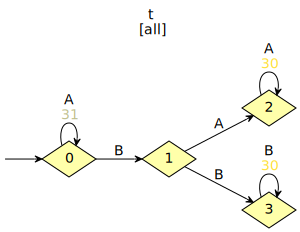

In [9]:
bdict = spot.make_bdd_dict()
game = spot.make_twa_graph(bdict)
game.new_states(4)
#s1, s2, s21, s22 = 0, 1, 2, 3
dict_bdd = {}
for e in ["A", "B"]:
    dict_bdd[e] = bdd_ithvar(game.register_ap(e))
game.new_edge(0, 0, dict_bdd["A"] ,[0,1])
game.new_edge(0, 1, dict_bdd["B"] ,[0,1])
game.new_edge(1, 2, dict_bdd["A"] ,[0])
game.new_edge(2, 2, dict_bdd["A"] ,[0])
game.new_edge(1, 3, dict_bdd["B"] ,[1])
game.new_edge(3, 3, dict_bdd["B"] ,[1])


game.set_init_state(0)

game.set_generalized_buchi(2)
spot.set_state_players(game, [True]*4)
p_game = spot.parity_type_to_parity(game)
spot.set_state_players(p_game, [True]*4)
p_game.show('.')  # Use "g" to hide the irrelevant edge labels.

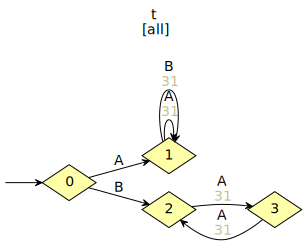

In [6]:
import spot
from buddy import bddtrue, bdd_ithvar
spot.setup()
bdict = spot.make_bdd_dict()
game = spot.make_twa_graph(bdict)
game.new_states(4)
#s1, s2, s21, s22 = 0, 1, 2, 3
dict_bdd = {}
for e in ["A", "B"]:
    dict_bdd[e] = bdd_ithvar(game.register_ap(e))
game.new_edge(0, 1, dict_bdd["A"] ,[0,1])
game.new_edge(1, 1, dict_bdd["A"] ,[0,1])
game.new_edge(1, 1, dict_bdd["B"] ,[0,1])
game.new_edge(0, 2, dict_bdd["B"] ,[0])
game.new_edge(2, 3, dict_bdd["A"] ,[1])
game.new_edge(3, 2, dict_bdd["A"] ,[0])
game.set_init_state(0)
game.set_generalized_buchi(2)
spot.set_state_players(game, [True]*4)
game.show('.')  # Use "g" to hide the irrelevant edge labels.
p_game = spot.parity_type_to_parity(game)
spot.set_state_players(p_game, [True]*4)
p_game.show('.')  # Use "g" to hide the irrelevant edge labels.

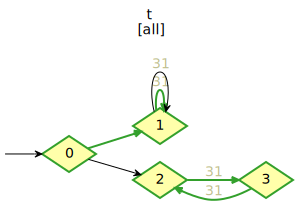

In [7]:
spot.solve_parity_game(p_game)
spot.highlight_strategy(p_game)
p_game.show('.g')
# for i,b in enumerate(spot.get_state_winners(p_game)):
#     print(i, ":", b)

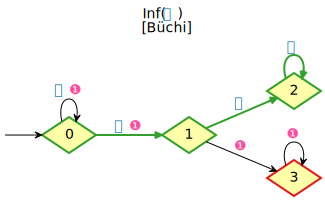

In [13]:
game.set_buchi()
spot.solve_game(game)
spot.highlight_strategy(game)
game.show('.g')

In [18]:
game.set_buchi()
acc = spot.acc_code('Inf(1)')
game.set_acceptance('Buchi 1')
spot.solve_game(game)
spot.highlight_strategy(game)
game.show('.g')

TypeError: in method 'twa_set_acceptance', argument 2 of type 'spot::acc_cond const &'
Additional information:
Wrong number or type of arguments for overloaded function 'twa_set_acceptance'.
  Possible C/C++ prototypes are:
    spot::twa::set_acceptance(unsigned int,spot::acc_cond::acc_code const &)
    spot::twa::set_acceptance(spot::acc_cond const &)


In [18]:
print(p_game.to_str('hoa'))

RuntimeError: print_hoa(): automaton has transition-based acceptance despite prop_state_acc()==true

HOA: v1
States: 4
Start: 0
AP: 3 "A" "B1" "B2"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc
spot-state-player: 1 1 1 1
--BODY--
State: 0
[0] 0
[1] 1 {0}
[2] 2 {1}
State: 1
[0] 1 {0}
[2] 3 {0 1}
State: 2
[0] 2 {1}
[1] 3 {0 1}
State: 3
[0] 3 {0 1}
--END--


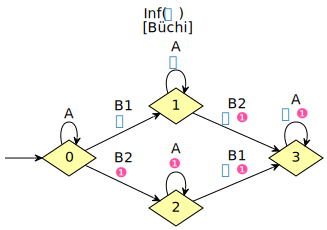

In [16]:
game.set_buchi()
print(game.to_str('hoa'))
game.show('.')

In [19]:
spot.solve_game(p_game)
spot.highlight_strategy()
p_game.show('.g')

RuntimeError: get_state_players(): state-player property not defined, not a game?

In [ ]:
print(spot.get_state_winners(game))

In [ ]:
for i,b in enumerate(spot.get_state_winners(game)):
    print(i, ":", b)

In [ ]:
from examples.sokoban import init_bprogram, map_settings, pygame_settings
from dfs.dfs_bprogram import DFSBProgram
import spot
from buddy import bddtrue
spot.setup()
from examples.sokoban_pygame.sokoban_maps import maps
map_settings["map"] = maps[0]
pygame_settings["display"] = False

In [ ]:
dfs = DFSBProgram(init_bprogram)
init, states = dfs.run()
graph = DFSBProgram.save_graph(init, states, "graph.dot")
graph

In [ ]:
from bp.spot_ess import SpotESS
import spot
from buddy import bddtrue
from utils import timer

spot.setup()

In [ ]:
with open("hoa_files/ok.hoa", "r") as f:
    aut = spot.parse_aut(f.read())


In [ ]:
for a in spot.automata('hoa_files/error.hoa'):
    display(a)

In [ ]:
for a in spot.automata('automata/e.aut'):
    display(a)

In [ ]:
game.save('automata/e.aut', format='hoa', append=True)